In [44]:
h

BASIC_COLS = [
    "HEFAMINC",  # Family income
    "PEEDUCA",  # highest level of education
    "PESCHENR",  # last week enrolled in school?
    "PESEX",  # sex
    "PEMARITL",  # marital
    "PUDIS",  # disability status
    "PEDISPHY",  # serious difficulty walking or climbing
    "PEDISDRS",  # difficluty dressing or bathing
    "PEDISOUT",  # physical, mental, or emotional condition, difficulty doing errands
    "PRDISFLG",  # Any of these disability conditions?
    "PEHRUSL1",  # hours per week at main job
    "PEHRUSL2",  # hours per week at other job/jobs
    "PUABSOT",  # last week have job?
    "PEMJOT",  # more than one job?
    "PEMJNUM",  # totally, how many job?
    "PEIO1COW",  # 1st job class of worker code
    "PRDTIND1",  # 1st job detailed industry
    "PRDTOCC1",  # 1st job detailed occupation
    "PRMJIND1",  # 1st job major industry recode
    "PWSSWGT",  # person final weight
    "HRHHID",  # household identifier 1
    "HRHHID2",  # household identifier 2
]

ASEC_COLS = [
    "H_IDNUM",
    "HEFAMINC",  # family income from CPS recode
    "PEARNVAL",  # total persons earnings
    "PTOT_R",  # total person income recode
    "GTCBSASZ",  # metropolitan area size
    "GTCO",  # fips county code
    "GESTFIPS",  # fips state code
    "A_SEX", # person gender
    "A_AGE",  # person age
    "A_WKSTAT", # Full/part-time status
    "WSAL_VAL", # total wage & salary earnings (comb. ERN_VAL, i f ERN_SRCE=1, and WS_VAL)
    "DSAB_VAL",  # disability income
    "PRDTRACE",  # race
    "PEDISPHY",  # serious difficulty walking or climbing
    "PEDISDRS",  # difficluty dressing or bathing
    "PEDISOUT",  # physical, mental, or emotional condition, difficulty doing errands
    "HRSWK",  # hours per week at main job
    "INDUSTRY",
    "WEIND",
    "WEMIND",
    "OCCUP",
    "POCCU2",
    "WEMOCG",
    "LJCW"
]

#Table 1 – I&O Details for Current Job (Basic CPS) and Longest Job (ASEC Supplement)

PICKLE_DIR = pathlib.Path("data")

In [60]:
asec = {}
for asec_pkl in PICKLE_DIR.glob("asec_*.pkl"):
    yrs = asec_pkl.stem[5:9]
    asec[yrs] = pickle.load(open(asec_pkl, "rb"))

In [3]:
asec = get_asec(2019, ASEC_COLS)

In [6]:
basic = get_basic(2024, 1, BASIC_COLS)

set()

In [ ]:
set(asec["h_idnum"]) & (set(basic["hrhhid"].astype(str) + basic["hrhhid2"].astype(str)))

In [65]:
print(len(asec["2019"]["a_wkstat"]))
print(asec["2019"]["a_wkstat"] == 2)

180101
0         False
1         False
2          True
3         False
4         False
          ...  
180096     True
180097    False
180098    False
180099     True
180100     True
Name: a_wkstat, Length: 180101, dtype: bool


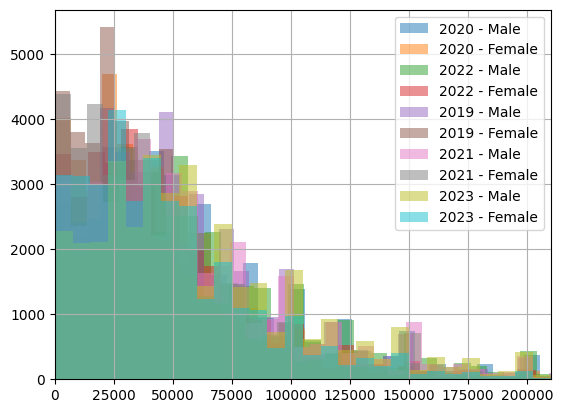

In [66]:
fig, ax = plt.subplots()


for yrs in asec:
    mean = asec[yrs]['pearnval'].mean()
    std_dev = asec[yrs]['pearnval'].std()

    lower_bound = 10
    upper_bound = mean + 3 * std_dev  # adjust multiplier as needed
    filtered_data = asec[yrs][(asec[yrs]['pearnval'] >= lower_bound) & (asec[yrs]['pearnval'] <= upper_bound)]
    filtered_data[filtered_data["a_sex"] == 1]["pearnval"].hist(ax=ax, bins=32, alpha=0.5, label=f"{yrs} - Male")
    filtered_data[filtered_data["a_sex"] == 2]["pearnval"].hist(ax=ax, bins=32, alpha=0.5, label=f"{yrs} - Female")



ax.set_xlim(0, 2.1e5)
ax.legend()